In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

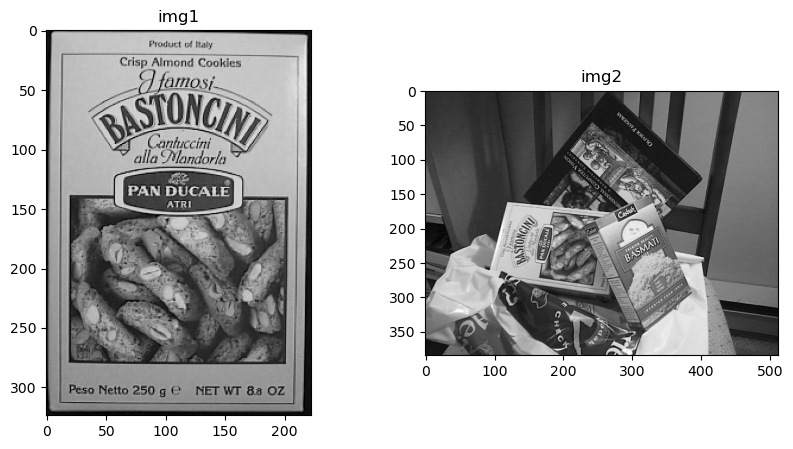

In [2]:
img1 = cv2.imread('box.png')
img2 = cv2.imread('box_in_scene.png')

img1 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)

plt.figure(figsize=(10,5))
plt.subplot(121);plt.imshow(img1[...,::-1]);plt.title('img1');
plt.subplot(122);plt.imshow(img2[...,::-1]);plt.title('img2');

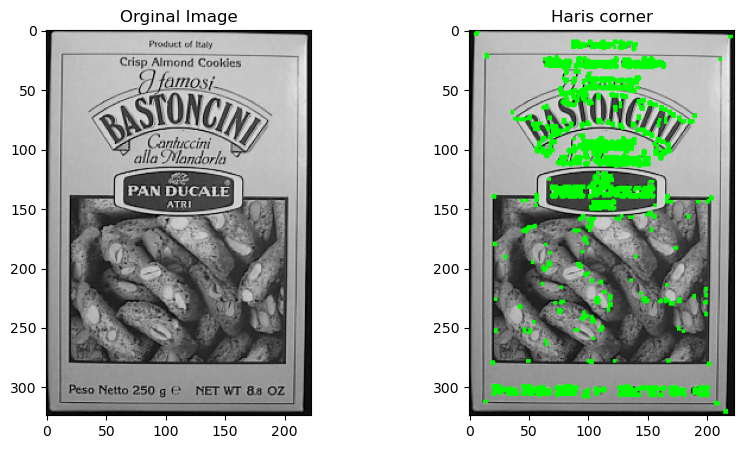

In [3]:
# Haris corner
image = img1.copy()
grayed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayed_image = np.float32(grayed_image)

dst = cv2.cornerHarris(grayed_image, blockSize=2, ksize=3, k=0.04)

dst = cv2.dilate(dst, None)
image[dst > 0.01 * dst.max()] = [0, 255, 0]

plt.figure(figsize=(10,5))
plt.subplot(121);plt.imshow(img1[...,::-1]);plt.title('Orginal Image');
plt.subplot(122);plt.imshow(image);plt.title('Haris corner');


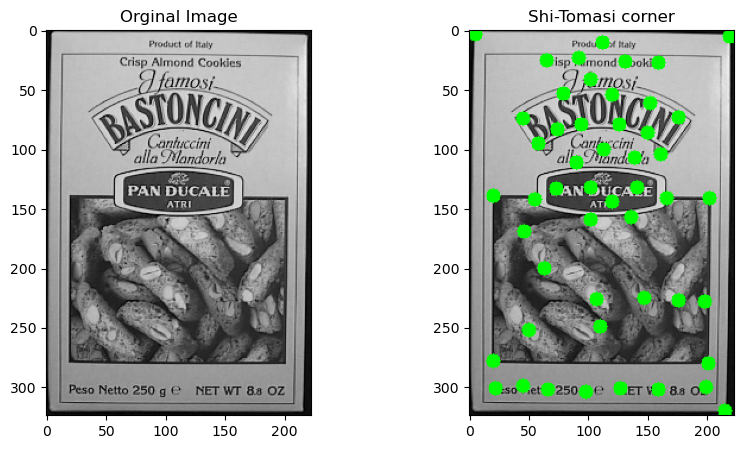

In [4]:
# Shi-Tomasi corner
image = img1.copy()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
corners = cv2.goodFeaturesToTrack(
    gray_image, maxCorners=50, qualityLevel=0.02, minDistance=20)
corners = np.float32(corners)
  
for item in corners:
    x, y = item[0]
    x = int(x)
    y = int(y)
    cv2.circle(image, (x, y), 6, (0, 255, 0), -1)
  

plt.figure(figsize=(10,5))
plt.subplot(121);plt.imshow(img1[...,::-1]);plt.title('Orginal Image');
plt.subplot(122);plt.imshow(image);plt.title('Shi-Tomasi corner');

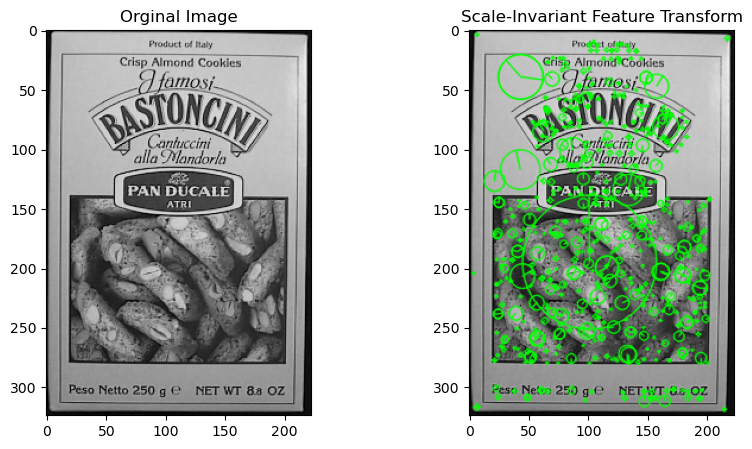

In [5]:
#SIFT => Scale-Invariant Feature Transform
image = img1.copy()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray_image, None)

kp_image = cv2.drawKeypoints(image, kp, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,5))
plt.subplot(121);plt.imshow(img1[...,::-1]);plt.title('Orginal Image');
plt.subplot(122);plt.imshow(kp_image[...,::-1]);plt.title('Scale-Invariant Feature Transform');

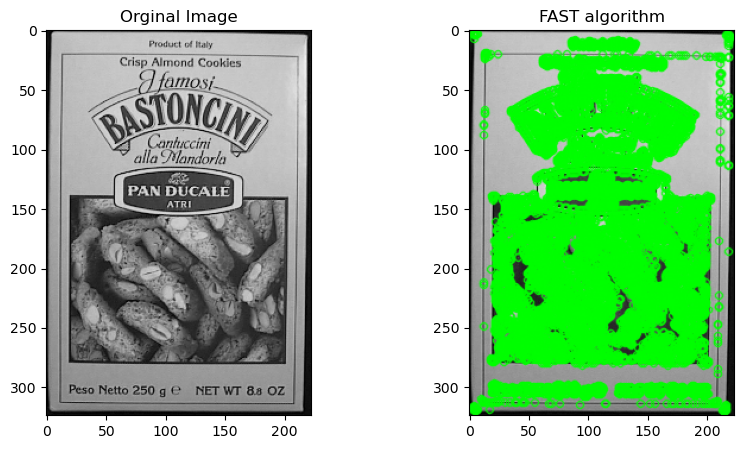

In [6]:
# FAST algorithm
image = img1.copy()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create()
fast.setNonmaxSuppression(False)

kp = fast.detect(gray_image, None)
kp_image = cv2.drawKeypoints(image, kp, None, color=(0, 255, 0))
  
plt.figure(figsize=(10,5))
plt.subplot(121);plt.imshow(img1[...,::-1]);plt.title('Orginal Image');
plt.subplot(122);plt.imshow(kp_image[...,::-1]);plt.title('FAST algorithm');

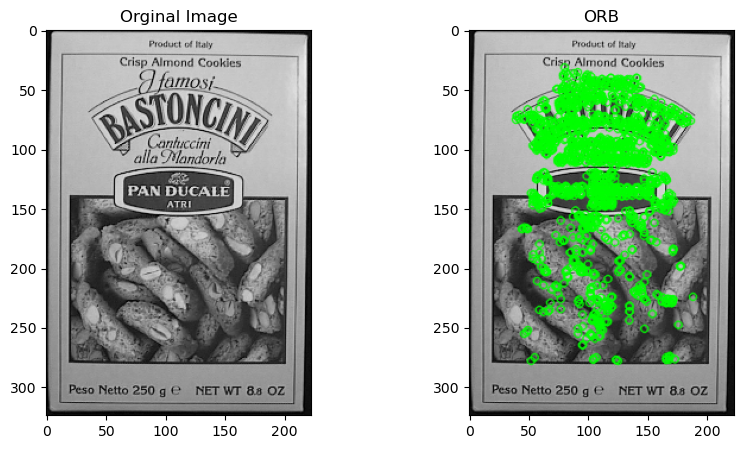

In [7]:
# ORB => Oriented FAST and Rotated Brief
image = img1.copy()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(gray_image, None)

kp_image = cv2.drawKeypoints(image, kp, None, color=(0, 255, 0), flags=0)
  
plt.figure(figsize=(10,5))
plt.subplot(121);plt.imshow(img1[...,::-1]);plt.title('Orginal Image');
plt.subplot(122);plt.imshow(kp_image[...,::-1]);plt.title('ORB');

In [8]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
print(des1.shape)
print(des2.shape)

(604, 128)
(969, 128)


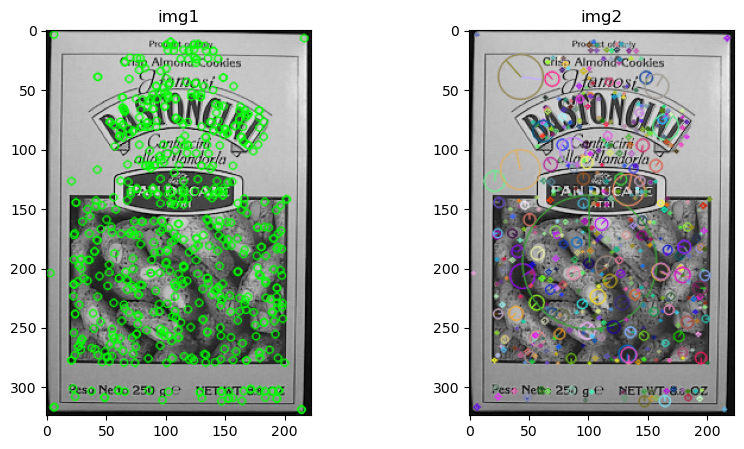

In [9]:
keypoints_without_size = np.copy(img1)

keypoints_with_size = np.copy(img1)

cv2.drawKeypoints(img1, kp1, keypoints_without_size, color=(0,255,0))
cv2.drawKeypoints(img1, kp1, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,5))
plt.subplot(121);plt.imshow(keypoints_without_size[...,::-1]);plt.title('img1');
plt.subplot(122);plt.imshow(keypoints_with_size[...,::-1]);plt.title('img2');

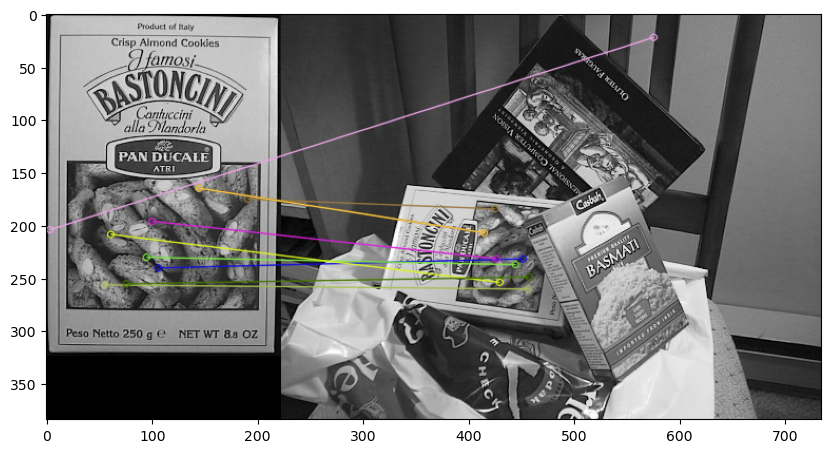


 Number of Matching keypoints between the Training and Query Images:  604


In [10]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

matches = bf.match(des1, des2)

matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10,10))
plt.imshow(img3[...,::-1])
plt.show()
print("\n Number of Matching keypoints between the Training and Query Images: ", len(matches))

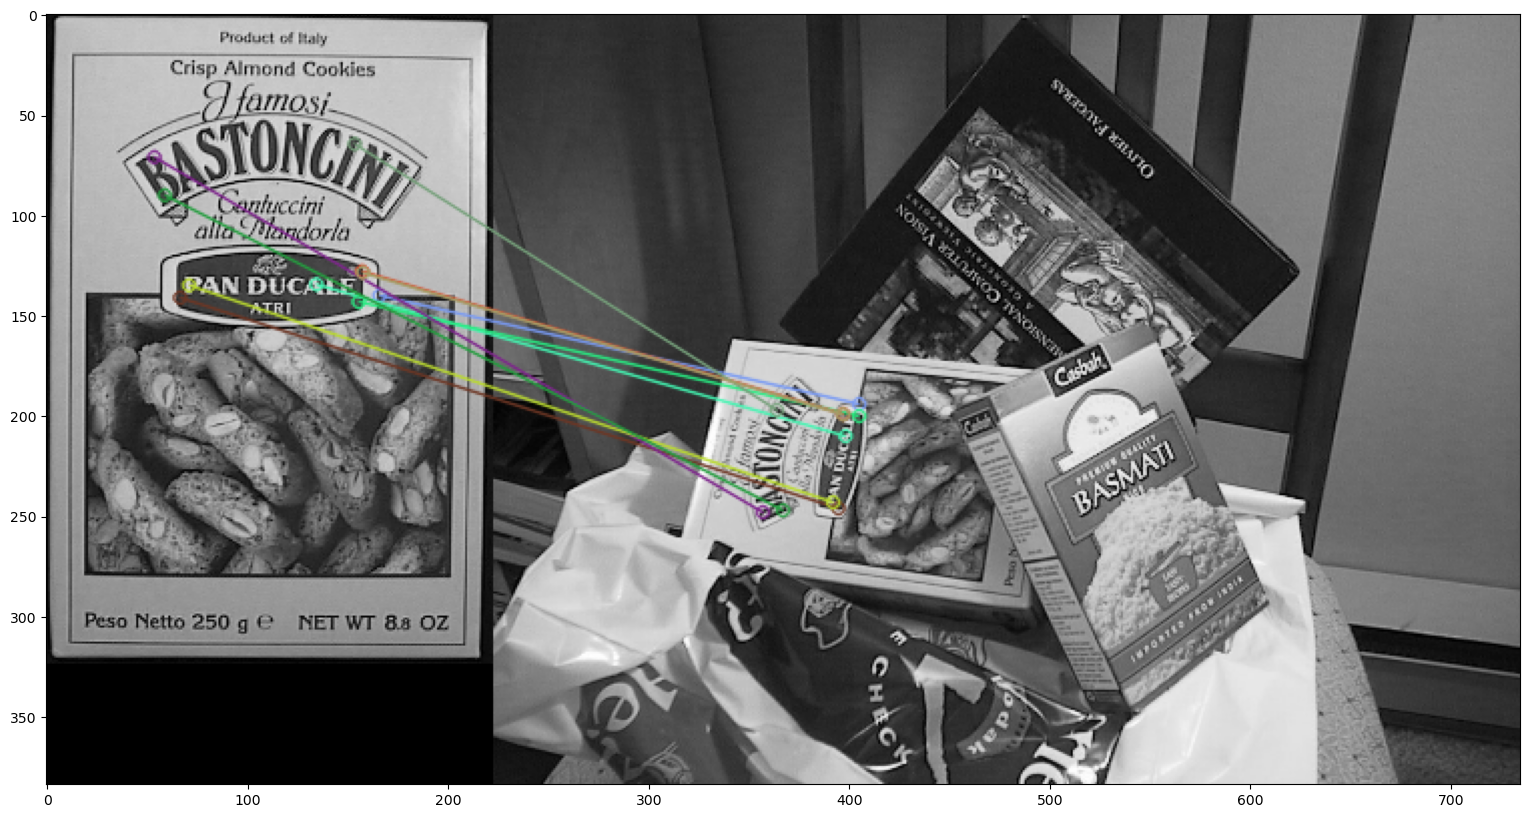


 Number of Matching keypoints between the Training and Query Images:  453


In [11]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck= False)

matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,10))
plt.imshow(img3[...,::-1])
plt.show()
print("\n Number of Matching keypoints between the Training and Query Images: ", len(matches))